# <span style="color:#0F19C9">Contenido</span>

- [Importar librerías y datos](#importar-librerías-y-datos)
- [Dataframe contract](#dataframe-contract)
- [Dataframe personal](#dataframe-personal)
- [Dataframe internet](#dataframe-internet)
- [Dataframe phone](#dataframe-phone)

# <span style="color:#0F19C9">Importar librerías y datos</span>

Comenzaremos por importar librerías de manipulación de dataframes, para la realización de pruebas estadísticas y matplotlib para la visualización de datos.

In [1]:
# Librerías de manejo de dataframes
import pandas as pd
import numpy as np
from scipy import stats

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Importar paletas de colores personalizada
juan_colors = ['#101B4B', '#545E85', '#A3A8B2',
               '#E7E7E7', '#0F19C9', '#F6D673']
colors = [juan_colors[5], juan_colors[0]]
juan_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Configurar la fuente de los gráficos
plt.rc('font', family='Georgia', size=12)

In [3]:
# Importar dataframes en un diccionario
dfs = {'contract': pd.read_csv('../Data/contract.csv'),
       'internet': pd.read_csv('../Data/internet.csv'),
       'personal': pd.read_csv('../Data/personal.csv'),
       'phone': pd.read_csv('../Data/phone.csv')}

# <span style="color:#0F19C9">Exploración inicial</span>

Comenzamos evaluando la calidad general de cada uno de los dataframes.

In [4]:
# Mostrar la información general de los dataframes
for name, df in dfs.items():
    print(f'Dataframe {name}')
    df.info()
    print('---------\n')

Dataframe contract
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
---------

Dataframe internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non

In [5]:
# Mostrar valores nulos y duplicados
for name, df in dfs.items():
    print(
        f'El dataframe {name} tiene {df.duplicated().sum()} registros duplicados y {df.isna().sum().sum()} valores nulos.')

El dataframe contract tiene 0 registros duplicados y 0 valores nulos.
El dataframe internet tiene 0 registros duplicados y 0 valores nulos.
El dataframe personal tiene 0 registros duplicados y 0 valores nulos.
El dataframe phone tiene 0 registros duplicados y 0 valores nulos.


In [6]:
# Escribir el nombre exacto de las columnas
for name, df in dfs.items():
    print(f'Las columnas del dataframe {name} son {list(df.columns)}')

Las columnas del dataframe contract son ['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
Las columnas del dataframe internet son ['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
Las columnas del dataframe personal son ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']
Las columnas del dataframe phone son ['customerID', 'MultipleLines']


In [7]:
# Modificar el formato del nombre de las columnas
dfs['contract'].columns = ['CustomerID', 'BeginDate', 'EndDate', 'Type',
                           'PaperlessBilling', 'PaymentMethod',
                           'MonthlyCharges', 'TotalCharges']
dfs['internet'].columns = ['CustomerID', 'InternetService', 'OnlineSecurity',
                           'OnlineBackup', 'DeviceProtection', 'TechSupport',
                           'StreamingTV', 'StreamingMovies']
dfs['personal'].columns = ['CustomerID', 'Gender', 'SeniorCitizen', 'Partner',
                           'Dependents']
dfs['phone'].columns = ['CustomerID', 'MultipleLines']

In [8]:
# Comprobar las modificaciones
for name, df in dfs.items():
    print(f'Las columnas del dataframe {name} son {list(df.columns)}')

Las columnas del dataframe contract son ['CustomerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
Las columnas del dataframe internet son ['CustomerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
Las columnas del dataframe personal son ['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents']
Las columnas del dataframe phone son ['CustomerID', 'MultipleLines']


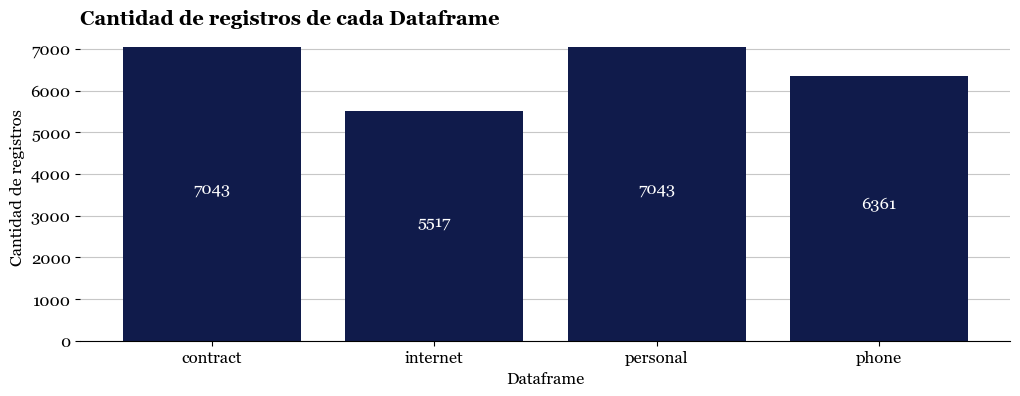

In [9]:
# Graficar la cantidad de registros de cada dataframe
fig, ax = plt.subplots(figsize=[12, 4])
plt.title('Cantidad de registros de cada Dataframe',
          weight='bold', loc='left')
bars = plt.bar(dfs.keys(),
               [df.shape[0] for df in dfs.values()],
               color=juan_colors[0],
               zorder=2)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f'{bar.get_height()}',
             ha='center',
             color='white')
plt.xlabel('Dataframe')
plt.ylabel('Cantidad de registros')
plt.grid(axis='y', zorder=1, alpha=0.7)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

Nos encontramos con 4 archivos Comma-Separated Values (CSV) con la información correspondiente a los usuarios de la compañía Interconnect. Ninguno de los dataframes contiene registros duplicados, ni registros nulos. Cada archivo contiene los siguiente:
- El dataframe `contract` contiene la información del contrato de los servicios con una columna de `customerID` que indica un valor único para cada usuario.
- El dataframe `internet` contiene los servicios específicos que presta la compañía en internet.
    - La columna `InternetService` especifica el tipo de servicio DSL o Fibra Óptica.
    - Los otros servicios opcionales que son:
        - `OnlineSecurity`: Bloqueador de sitios web maliciosos.
        - `OnlineBackup`: Almacenamiento de archivos en la nube.
        - `DeviceProtection`: Software antivirus.
        - `TechSupport`: Línea de soporte técnico.
        - `StreamingTV`: Streaming de TV.
        - `StreamingMovies`: Streaming de películas.
- El dataframe `personal` contiene los datos personales del cliente.
- El dataframe `phone` contiene el servicio de líneas separadas de telefonía fija.

La única modificación inicial que se realizó, fue modificar el formato del nombre de las columnas para estandarizarlo, dejando todas con la primera letra mayúscula.

Los dataframes `contract` y `personal` contienen la mayor cantidad de registros (7043). El dataframe `internet` contiene 5517 y `phone` 6361.

# <span style="color:#0F19C9">Dataframe contract</span>

Exploraremos el dataframe contract, primero con un análisis univariable, es decir, de cada columna; para luego encontrar relaciones en un análisis multivariable.

## <span style="color:#0F19C9">Análisis Univariable</span>

In [10]:
# Comprobar el número de CustomerIDs únicos
dfs['contract']['CustomerID'].nunique() == dfs['contract'].shape[0]

True

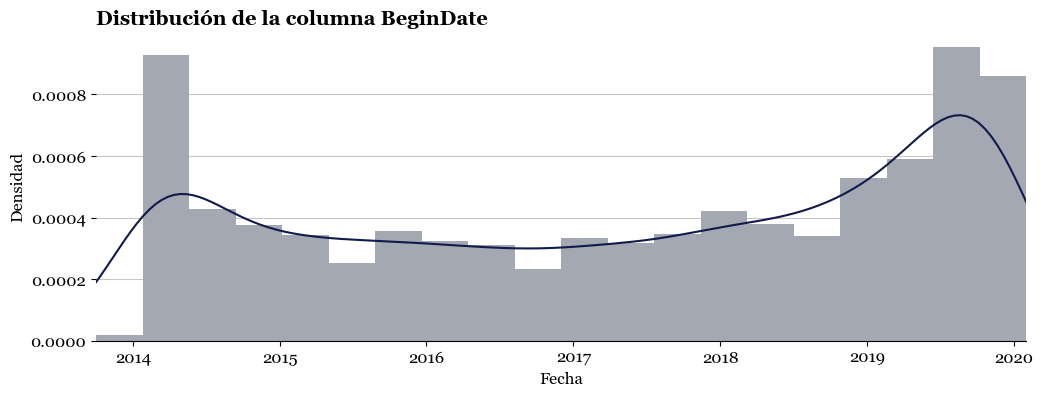

count                             7043
mean     2017-04-30 13:01:50.918642688
min                2013-10-01 00:00:00
25%                2015-06-01 00:00:00
50%                2017-09-01 00:00:00
75%                2019-04-01 00:00:00
max                2020-02-01 00:00:00
Name: BeginDate, dtype: object

In [11]:
# Modificar el formato de BeginDate
dfs['contract']['BeginDate'] = pd.to_datetime(dfs['contract']['BeginDate'])

# Estudiar su distribución
fig, ax = plt.subplots(figsize=[12, 4])
plt.title('Distribución de la columna BeginDate',
          weight='bold', loc='left')
sns.kdeplot(dfs['contract']['BeginDate'],
            color=juan_colors[0],
            zorder=3)
plt.hist(dfs['contract']['BeginDate'],
         density=True, color=juan_colors[2],
         bins=20, zorder=2)
plt.xlim((dfs['contract']['BeginDate'].min(),
          dfs['contract']['BeginDate'].max()))
plt.grid(axis='y', zorder=1, alpha=0.7)
plt.xlabel('Fecha')
plt.ylabel('Densidad')
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

# Describir estadísticamente
dfs['contract']['BeginDate'].describe()

In [12]:
# Contar los valores individuales normalizados de la columna EndDate
dfs['contract']['EndDate'].value_counts(normalize=True)

EndDate
No                     0.734630
2019-11-01 00:00:00    0.068863
2019-12-01 00:00:00    0.066165
2020-01-01 00:00:00    0.065313
2019-10-01 00:00:00    0.065029
Name: proportion, dtype: float64

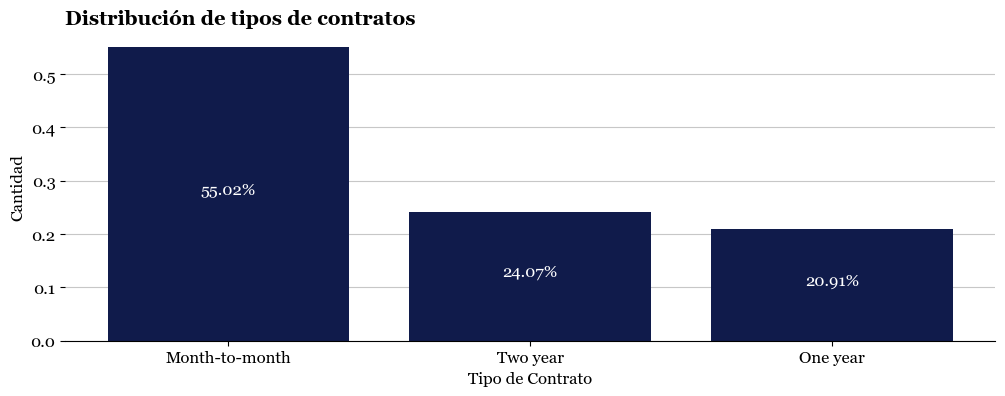

In [13]:
# Contar los valores normalizados de la columna Type
type_contract = dfs['contract']['Type'].value_counts(normalize=True)

# Graficar la distribución de tipos
fig, ax = plt.subplots(figsize=[12, 4])
plt.title('Distribución de tipos de contratos',
          weight='bold', loc='left')
bars = plt.bar(type_contract.index,
               type_contract,
               color=juan_colors[0],
               zorder=2)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f'{(bar.get_height())*100:.2f}%',
             ha='center',
             color='white')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad')
plt.grid(axis='y', zorder=1, alpha=0.7)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

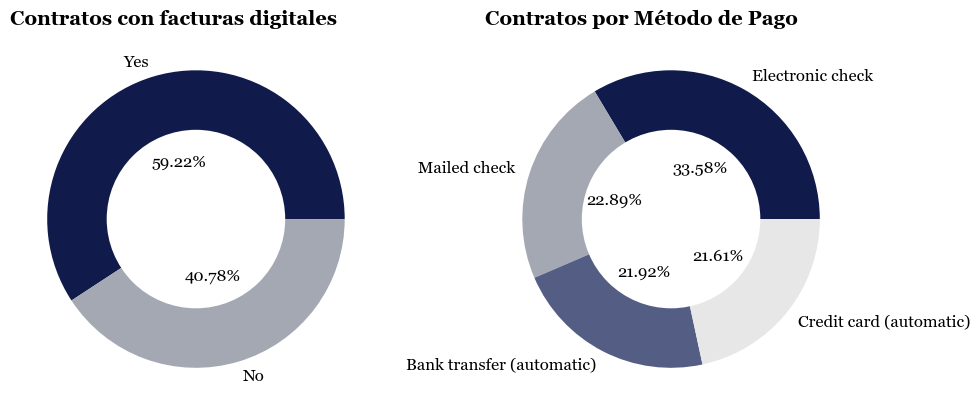

In [14]:
# Contar los valores normalizados de la columna PaperlessBilling
paper_contracts = dfs['contract']['PaperlessBilling'].value_counts(
    normalize=True)

# Contar los valores normalizados de la columna PaperlessBilling
payment_contracts = dfs['contract']['PaymentMethod'].value_counts(
    normalize=True)

# Graficar la distribución de paperless
fig, ax = plt.subplots(1, 2, figsize=[10, 5])
ax[0].set_title('Contratos con facturas digitales',
                loc='left', weight='bold')
paper_contracts \
    .plot.pie(autopct='%1.2f%%', pctdistance=0.4,
              colors=[juan_colors[0], juan_colors[2]],
              ax=ax[0])
ax[0].set_ylabel('')
hole1 = plt.Circle((0, 0), 0.6,
                   facecolor='white', transform=ax[0].transData)
ax[0].add_artist(hole1)

ax[1].set_title('Contratos por Método de Pago',
                loc='left', weight='bold')
payment_contracts \
    .plot.pie(autopct='%1.2f%%', pctdistance=0.4,
              colors=[juan_colors[0], juan_colors[2],
                      juan_colors[1], juan_colors[3]],
              ax=ax[1])
ax[1].set_ylabel('')
hole2 = plt.Circle((0, 0), 0.6,
                   facecolor='white', transform=ax[1].transData)
ax[1].add_artist(hole2)
plt.tight_layout()
plt.show()

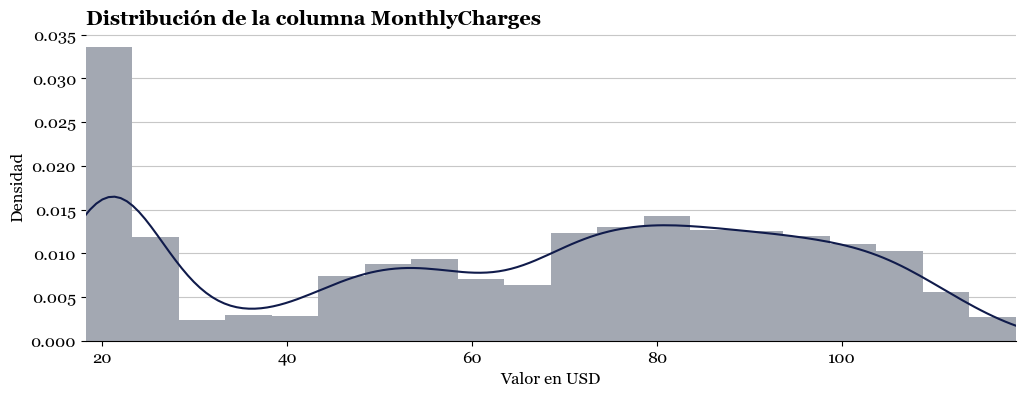

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [15]:
# Estudiar su distribución
fig, ax = plt.subplots(figsize=[12, 4])
plt.title('Distribución de la columna MonthlyCharges',
          weight='bold', loc='left')
sns.kdeplot(dfs['contract']['MonthlyCharges'],
            color=juan_colors[0],
            zorder=3)
plt.hist(dfs['contract']['MonthlyCharges'],
         density=True, color=juan_colors[2],
         bins=20, zorder=2)
plt.xlim((dfs['contract']['MonthlyCharges'].min(),
          dfs['contract']['MonthlyCharges'].max()))
plt.grid(axis='y', zorder=1, alpha=0.7)
plt.xlabel('Valor en USD')
plt.ylabel('Densidad')
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

# Describir estadísticamente
dfs['contract']['MonthlyCharges'].describe()

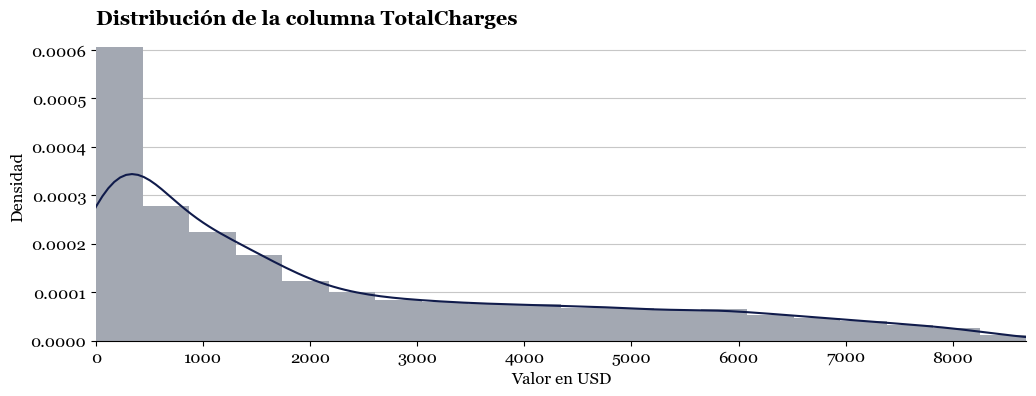

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [16]:
# Corregir el formato de la columna TotalCharges
dfs['contract']['TotalCharges'] = dfs['contract']['TotalCharges'] \
    .replace(' ', '0').astype('float')

# Estudiar su distribución
fig, ax = plt.subplots(figsize=[12, 4])
plt.title('Distribución de la columna TotalCharges',
          weight='bold', loc='left')
sns.kdeplot(dfs['contract']['TotalCharges'],
            color=juan_colors[0],
            zorder=3)
plt.hist(dfs['contract']['TotalCharges'],
         density=True, color=juan_colors[2],
         bins=20, zorder=2)
plt.xlim((dfs['contract']['TotalCharges'].min(),
          dfs['contract']['TotalCharges'].max()))
plt.grid(axis='y', zorder=1, alpha=0.7)
plt.xlabel('Valor en USD')
plt.ylabel('Densidad')
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

# Describir estadísticamente
dfs['contract']['TotalCharges'].describe()

In [17]:
# Mostrar valores de TotalCharges igual a 0
dfs['contract'][dfs['contract']['TotalCharges'] == 0]

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,0.0
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,0.0
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,0.0
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,0.0
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,0.0
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,0.0
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,0.0
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,0.0
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,0.0


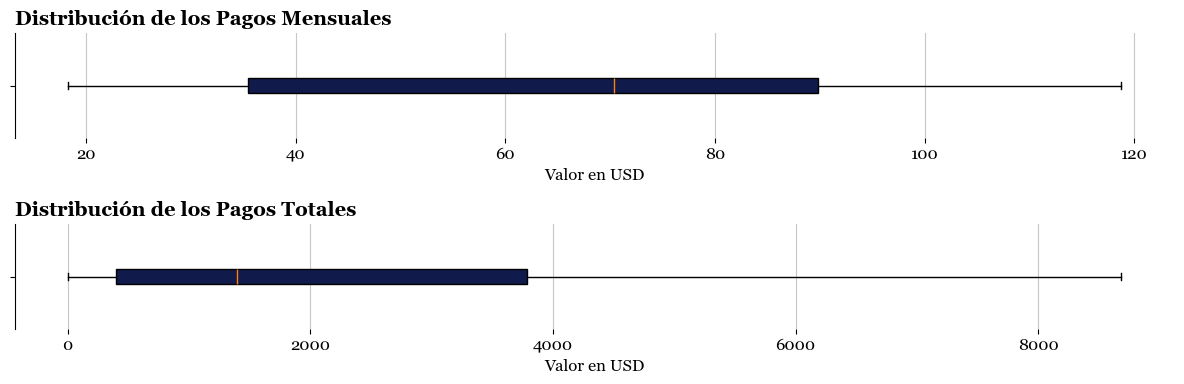

In [163]:
# Encontrar valores atípicos en los pagos
fig, ax = plt.subplots(2, 1, figsize=[12, 4])
ax[0].set_title('Distribución de los Pagos Mensuales',
                weight='bold', loc='left')
ax[0].boxplot(dfs['contract']['MonthlyCharges'],
              vert=False, patch_artist=True, boxprops=dict(facecolor=juan_colors[0]))
ax[0].grid(axis='x', zorder=1, alpha=0.7)
ax[0].set_xlabel('Valor en USD')
ax[0].set_yticklabels([''])
ax[0].spines[['top', 'right', 'bottom']].set_visible(False)

ax[1].set_title('Distribución de los Pagos Totales',
                weight='bold', loc='left')
ax[1].boxplot(dfs['contract']['TotalCharges'],
              vert=False, positions=[2], patch_artist=True, boxprops=dict(facecolor=juan_colors[0]))
ax[1].grid(axis='x', zorder=1, alpha=0.7)
ax[1].set_xlabel('Valor en USD')
ax[1].set_yticklabels([''])
ax[1].spines[['top', 'right', 'bottom']].set_visible(False)
plt.tight_layout()
plt.show()

Comprobamos que efectivamente tenemos valores únicos en la columna de `CustomerID` y que únicamente haya un registro por cada usuario. El contrato más antiguo comenzó el 1 de octubre de 2023, mientras el último fue firmado el 1 de febrero de 2020. Sin embargo, llama bastante la atención que en el 2014 y en el 2019 haya dos picos grandes de contratos iniciados. Es también importante mencionar que a partir de 2017, la compañía ha mostrado una tendencia al alza en las altas.

Respecto a la columna `EndDate`, tenemos únicamente 4 valores válidos en los que podemos evidenciar que las terminaciones de los contratos se producen al cambio de mes. Llama la atención que únicamente tengamos terminaciones en los meses de octubre, noviembre y diciembre del 2019 y en enero de 2020.

El 55.02% de los contratos son pagos mensuales, mientras el 24.07% son contratos a dos años, finalmente los contratos a un año representan el 20.91% del total de contratos. Además, el 59.22% de los registros han preferido el envío de sus facturas de manera digital.

En cuanto a los pagos mensuales, se observa una gran concentración sobre los USD $20, sin embargo no podemos hablar de una distribución normal, entre otras, porque hay una gran cantidad de pagos mensuales entre los USD $70 y los USD $110. Finalmente, para la columna de TotalCharges, se corrigió el formato de object a float y, como se ve en su distribución, sigue una distribución estándar. Sin embargo, nos encontramos con un valor '  ' que reemplazamos por 0, debido a que correspondía a 11 registros de contratos que comenzaron el 1 de febrero de 2020 y que son de uno o dos años, por lo que aún no ha habido pago total efectuado. Ni en la columna de pagos mensuales, ni en la columna de pagos totales encontramos valores atípicos.

## <span style="color:#0F19C9">Análisis Multivariable</span>

Debido a que tenemos gran cantidad de columnas categóricas, entonces correremos tanto la prueba de Pearson de Chi Cuadrado, como la prueba de Cramér's V.

TODO: Crear una columna nueva con el tiempo de permanencia de la persona basado en EndDate. Luego modificar sus valores para el entrenamiento.

In [49]:
# Función para calcular el valor p y Cramér's V
def cramers_v(confusion_matrix):
    chi2, p, dof, expected = stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return p, np.sqrt(chi2 / (n * (min(k, r) - 1)))

In [62]:
# Definir las columnas categóricas
cat_cols = ['Type', 'PaperlessBilling', 'PaymentMethod']

# Crear matrices vacías para almacenar los resultados
p_values_matrix = pd.DataFrame(np.zeros((len(cat_cols), len(cat_cols))),
                               index=cat_cols, columns=cat_cols)
cramers_v_matrix = pd.DataFrame(np.zeros((len(cat_cols), len(cat_cols))),
                                index=cat_cols, columns=cat_cols)

# Llenar las matrices
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 != col2:
            # Crear la tabla de contingencia
            confusion_matrix = pd.crosstab(dfs['contract'][col1],
                                           dfs['contract'][col2])

            # Calcular p-value y Cramér's V
            p_value, cramers_v_value = cramers_v(confusion_matrix)
            p_values_matrix.loc[col1, col2] = p_value
            cramers_v_matrix.loc[col1, col2] = cramers_v_value
        else:
            # Si col1 == col2, entonces la relación es perfecta (Cramér's V = 1)
            cramers_v_matrix.loc[col1, col2] = 1
            p_values_matrix.loc[col1, col2] = np.nan

# Mostrar la matriz de valores p
print('Matriz de valores p')
display(p_values_matrix)
print('Matriz de V de Cramer')
display(cramers_v_matrix)

Matriz de valores p


,Type,PaperlessBilling,PaymentMethod
Type,NaN,5.450960e-49,4.067638e-213
PaperlessBilling,5.450960e-49,NaN,4.115239e-94
PaymentMethod,4.067638e-213,4.115239e-94,NaN


Matriz de V de Cramer


,Type,PaperlessBilling,PaymentMethod
Type,1.000000,0.177645,0.266655
PaperlessBilling,0.177645,1.000000,0.248719
PaymentMethod,0.266655,0.248719,1.000000


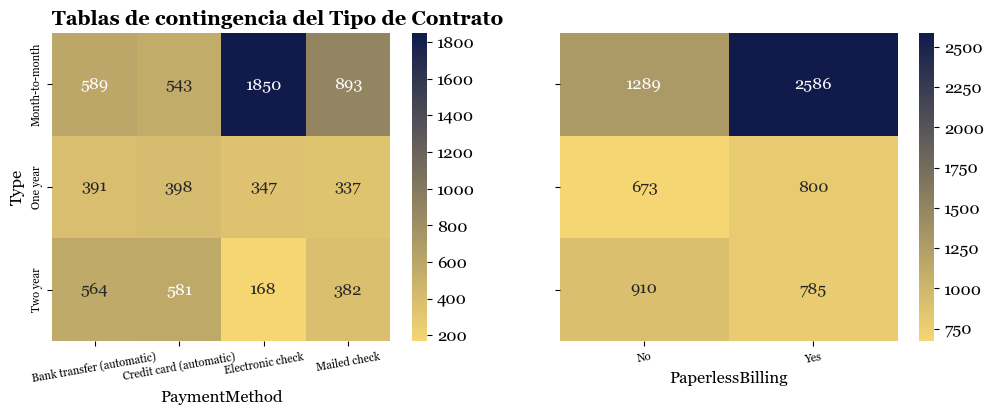

In [100]:
# Crear la tabla de contingencia
cont_table1 = pd.crosstab(dfs['contract']['Type'],
                          dfs['contract']['PaymentMethod'])
cont_table2 = pd.crosstab(dfs['contract']['Type'],
                          dfs['contract']['PaperlessBilling'])

# Hacer mapa de calor de tabla de contingencia
fig, ax = plt.subplots(1, 2, figsize=[12, 4], sharey=True)
ax[0].set_title('Tablas de contingencia del Tipo de Contrato',
                weight='bold', loc='left')
sns.heatmap(cont_table1, annot=True,
            ax=ax[0], cmap=juan_cmap,
            fmt='1.0f')
ax[0].set_xticklabels(ax[0].get_xticklabels(),
                      size=8, rotation=10)
ax[0].set_yticklabels(ax[0].get_yticklabels(), size=8)

sns.heatmap(cont_table2, annot=True,
            ax=ax[1], cmap=juan_cmap,
            fmt='1.0f')
ax[1].set_xticklabels(ax[1].get_xticklabels(),
                      size=8, rotation=10)
ax[1].set_ylabel('')
plt.show()

La matriz de valores p, al ser todos menores al valor de nuestra significancia estadística (0.05) nos indica que es muy probable que exista una relación entre las dos variables. Así que medimos el tamaño de la correlación usando la medida de V de Cramér en el que nos resulta que la relación entre `Type` y `PaperlessBilling` es muy débil con un valor de 0.17; mientras las relaciones de `PaymentMethod` tanto con `Type` como con `PaperlessBilling` son moderadas con valores de 0.26 y 0.24, respectivamente. Esto se puede ver principalmente en que la gran mayoría de los pagos mensuales han sido pagados de forma electrónica o a través de correo, con 1850 y 893 registros respectivamente; y que este mismo tipo de factura tiene en su mayoría la factura física, 2586 de ellos. Tampoco podemos ver que las personas que tienen un plan anual son las más propensas en no tener una factura física.

In [109]:
# Realizar las diferentes pruebas ANOVA sobre pago mensual
for cat_col in ['EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod']:
    groups = [dfs['contract'][dfs['contract'][cat_col] == category]
              ['MonthlyCharges'] for category in dfs['contract'][cat_col].unique()]
    print(
        f"Valor P entre {cat_col} y el pago mensual: {stats.f_oneway(*groups).pvalue}")
print('')

# Realizar las diferentes pruebas ANOVA sobre pago total
for cat_col in ['EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod']:
    groups = [dfs['contract'][dfs['contract'][cat_col] == category]
              ['TotalCharges'] for category in dfs['contract'][cat_col].unique()]
    print(
        f"Valor P entre {cat_col} y el pago total: {stats.f_oneway(*groups).pvalue}")

Valor P entre EndDate y el pago mensual: 1.718104903234723e-57
Valor P entre Type y el pago mensual: 9.575270975935273e-10
Valor P entre PaperlessBilling y el pago mensual: 9.997602630675124e-205
Valor P entre PaymentMethod y el pago mensual: 1.1802197193575694e-267

Valor P entre EndDate y el pago total: 2.466458244869139e-60
Valor P entre Type y el pago total: 0.0
Valor P entre PaperlessBilling y el pago total: 6.879636732170654e-41
Valor P entre PaymentMethod y el pago total: 5.30941682341985e-200


In [167]:
# Prueba T de Student de pagos con y sin terminación
group1 = dfs['contract'][dfs['contract']['EndDate'] == 'No']['MonthlyCharges']
group2 = dfs['contract'][dfs['contract']['EndDate'] != 'No']['MonthlyCharges']

print(f"Valor P: {stats.ttest_ind(group1, group2).pvalue}")

Valor P: 2.7066456068884154e-60


In [181]:
# Prueba T de Student de pagos con y sin terminación
group1 = dfs['contract'][dfs['contract']['EndDate'] == 'No']['TotalCharges']
group2 = dfs['contract'][dfs['contract']['EndDate'] != 'No']['TotalCharges']

print(f"Valor P: {stats.ttest_ind(group1, group2).pvalue}")

Valor P: 2.127211613240394e-63


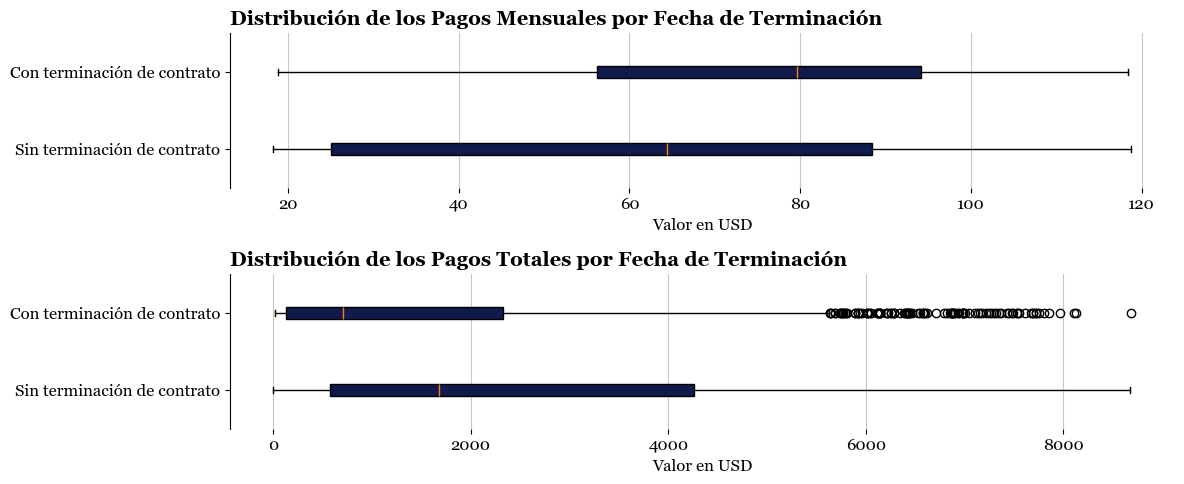

In [177]:
# Graficar las distribuciones
fig, ax = plt.subplots(2, 1, figsize=[12, 5])
ax[0].set_title('Distribución de los Pagos Mensuales por Fecha de Terminación',
                weight='bold', loc='left')
ax[0].boxplot(dfs['contract'][dfs['contract']['EndDate'] == 'No']['MonthlyCharges'],
              vert=False, positions=[1], patch_artist=True, boxprops=dict(facecolor=juan_colors[0]))
ax[0].boxplot(dfs['contract'][dfs['contract']['EndDate'] != 'No']['MonthlyCharges'],
              vert=False, positions=[2], patch_artist=True, boxprops=dict(facecolor=juan_colors[0]))
ax[0].set_yticks([1, 2])
ax[0].set_yticklabels(['Sin terminación de contrato',
                       'Con terminación de contrato'])
ax[0].grid(axis='x', zorder=1, alpha=0.7)
ax[0].set_xlabel('Valor en USD')
ax[0].spines[['top', 'right', 'bottom']].set_visible(False)

ax[1].set_title('Distribución de los Pagos Totales por Fecha de Terminación',
                weight='bold', loc='left')
ax[1].boxplot(dfs['contract'][dfs['contract']['EndDate'] == 'No']['TotalCharges'],
              vert=False, positions=[1], patch_artist=True, boxprops=dict(facecolor=juan_colors[0]))
ax[1].boxplot(dfs['contract'][dfs['contract']['EndDate'] != 'No']['TotalCharges'],
              vert=False, positions=[2], patch_artist=True, boxprops=dict(facecolor=juan_colors[0]))
ax[1].set_yticks([1, 2])
ax[1].set_yticklabels(['Sin terminación de contrato',
                       'Con terminación de contrato'])
ax[1].grid(axis='x', zorder=1, alpha=0.7)
ax[1].set_xlabel('Valor en USD')
ax[1].spines[['top', 'right', 'bottom']].set_visible(False)
plt.tight_layout()
plt.show()

Realizamos prueba ANOVA para poder determinar si existía alguna diferencia significativa entre nuestras columnas de pago mensual y pago total respecto a las diferentes columnas categóricas. Nos enfocamos en la relación con `EndDate` y con `PaymentMethod` ya que una será nuestra columna objetivo y las otras corresponden a los valores P más pequeños.

De las gráficas en las que comparamos las diferentes categorías de `EndDate` con los pagos mensuales podemos establecer directamente que el promedio de pagos de los clientes que continúan con nosotros son definitivamente más bajos que el promedio de las personas que ya finalizaron su contrato con nosotros, esto lo comprobamos haciendo la prueba t de Student del grupo de clientes que ya terminaron su contrato y de aquellos que no. Esto puede deberse, entre otras cosas, porque los clientes con pagos menores a USD $30 son más en los contratos que aún están activos. En el caso de los pagos totales, si encontramos una relación inversa en la que el promedio de usuarios que ya terminaron el contrato es mucho menor, e incluso posee muchos valores atípicos, que el promedio de clientes que aún tienen su servicio activo.

# <span style="color:#0F19C9">Dataframe personal</span>

Exploraremos el dataframe personal, primero con un análisis univariable, es decir, de cada columna; para luego encontrar relaciones en un análisis multivariable.

## <span style="color:#0F19C9">Análisis Univariable</span>

## <span style="color:#0F19C9">Análisis Multivariable</span>

# <span style="color:#0F19C9">Dataframe internet</span>

Exploraremos el dataframe internet, primero con un análisis univariable, es decir, de cada columna; para luego encontrar relaciones en un análisis multivariable.

## <span style="color:#0F19C9">Análisis Univariable</span>

## <span style="color:#0F19C9">Análisis Multivariable</span>

# <span style="color:#0F19C9">Dataframe phone</span>

Exploraremos el dataframe phone, primero con un análisis univariable, es decir, de cada columna; para luego encontrar relaciones en un análisis multivariable.

## <span style="color:#0F19C9">Análisis Univariable</span>

## <span style="color:#0F19C9">Análisis Multivariable</span>